In [90]:
# Load libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Connect to database
conn = sqlite3.connect('C:/Users/guilh/OneDrive/Desktop/TUE/Y2Q4/CBL/project/data/crime_data.db')

# Load data
df = pd.read_sql_query("SELECT CrimeID, Month, Longitude, Latitude, LSOA_Code, Type, Outcome FROM crime", conn)

# Preprocessing
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df['Year'] = df['Month'].dt.year
df['Month_Num'] = df['Month'].dt.month
df['Season'] = df['Month'].dt.month % 12 // 3 + 1
df['Season'] = df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})


In [91]:
df.head()

,crimeID,Month,Longitude,Latitude,LSOA_code,Type,Outcome,Year,Month_Num,Season
0,6b1be5a8275fcda2982f6de7bb92e03499d33c7fa6316b...,2022-03-01,-0.445898,50.803304,E01031422,Violence and sexual offences,Status update unavailable,2022,3,Spring
1,b466ed98f60835f379377cda209f72a65f4b594d64b8a6...,2022-03-01,-0.530681,50.804178,E01031400,Violence and sexual offences,Investigation complete; no suspect identified,2022,3,Spring
2,cc667a5d8c2fa4f30ade960d334d4c1feac01170092470...,2022-03-01,0.876572,51.137084,E01024001,Theft from the person,Investigation complete; no suspect identified,2022,3,Spring
3,a60d9d1cff047a67e9a22361a6aa27ad978ec0f71f482a...,2022-03-01,0.969845,51.124173,E01024013,Violence and sexual offences,Status update unavailable,2022,3,Spring
4,62823a01dfebac3445a665d4e0ebc92af01106c8384c26...,2022-03-01,-0.813313,51.809402,E01017712,Violence and sexual offences,Status update unavailable,2022,3,Spring


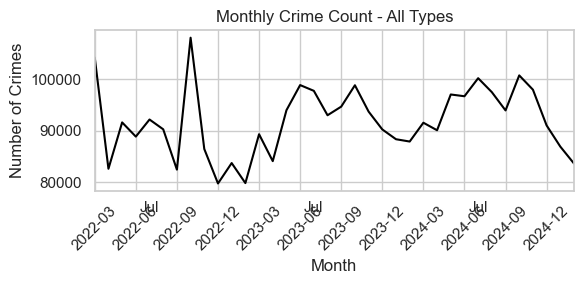

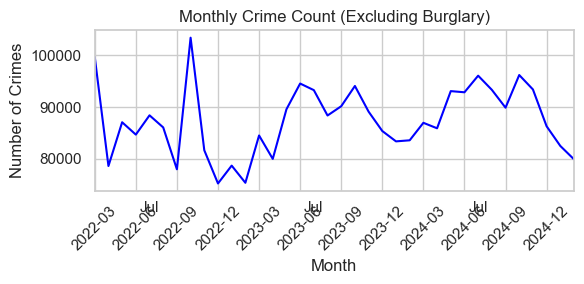

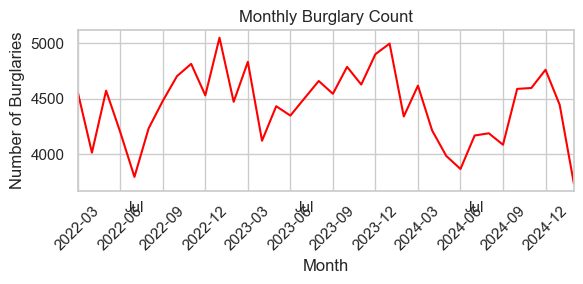

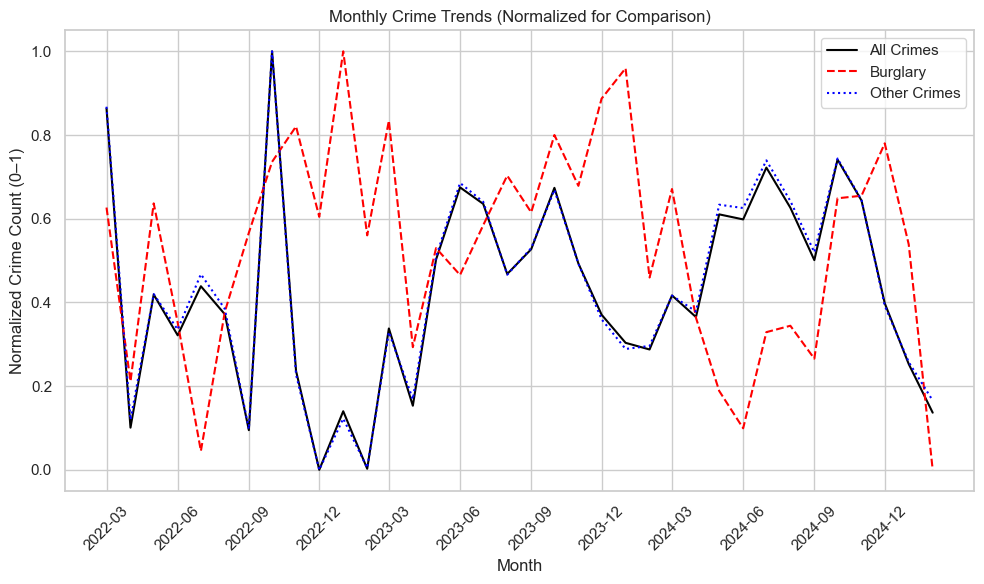

In [92]:
# Monthly distribution of ALL crimes
monthly_all = df.groupby(df['Month']).size()

plt.figure(figsize=(6, 3))
ax = monthly_all.plot(color='black')

# Set x-axis labels to show every three months
xticks = monthly_all.index[::3]
ax.set_xticks(xticks)
ax.set_xticklabels([x.strftime('%Y-%m') for x in xticks], rotation=45)

plt.title('Monthly Crime Count - All Types')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# Monthly distribution of NON-BURGLARY crimes
monthly_non_burglary = df[df['Type'] != 'Burglary'].groupby(df['Month']).size()

plt.figure(figsize=(6, 3))
ax0 = monthly_non_burglary.plot(color='blue')

# Set x-axis labels to show every three months
xticks = monthly_non_burglary.index[::3]
ax0.set_xticks(xticks)
ax0.set_xticklabels([x.strftime('%Y-%m') for x in xticks], rotation=45)

plt.title('Monthly Crime Count (Excluding Burglary)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# Monthly distribution of BURGLARY
monthly_burglary = df[df['Type'] == 'Burglary'].groupby(df['Month']).size()

plt.figure(figsize=(6, 3))
ax1 = monthly_burglary.plot(color='red')

# Set x-axis labels to show every three months
xticks = monthly_burglary.index[::3]
ax1.set_xticks(xticks)
ax1.set_xticklabels([x.strftime('%Y-%m') for x in xticks], rotation=45)

plt.title('Monthly Burglary Count')
plt.xlabel('Month')
plt.ylabel('Number of Burglaries')
plt.tight_layout()
plt.show()


# Monthly Comparison – All vs Burglary vs Non-Burglary (Normalized to 0–1)

# Combine the series into one DataFrame
monthly_combined = pd.DataFrame({
    'All Crimes': monthly_all,
    'Burglary': monthly_burglary,
    'Other Crimes': monthly_all - monthly_burglary
}).fillna(0)

# Normalize each column to 0–1 range (min-max scaling)
monthly_normalized = (monthly_combined - monthly_combined.min()) / (monthly_combined.max() - monthly_combined.min())

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(monthly_normalized.index, monthly_normalized['All Crimes'], label='All Crimes', color='black', linestyle='-')
ax.plot(monthly_normalized.index, monthly_normalized['Burglary'], label='Burglary', color='red', linestyle='--')
ax.plot(monthly_normalized.index, monthly_normalized['Other Crimes'], label='Other Crimes', color='blue', linestyle=':')

# Format x-axis to show every 3 months
xticks = monthly_normalized.index[::3]
ax.set_xticks(xticks)
ax.set_xticklabels([x.strftime('%Y-%m') for x in xticks], rotation=45)

plt.title('Monthly Crime Trends (Normalized for Comparison)')
plt.xlabel('Month')
plt.ylabel('Normalized Crime Count (0–1)')
plt.legend()
plt.tight_layout()
plt.show()


We can see that there are some periods where crimes drop but burglary rises, such as the first 3 months of 2023. 

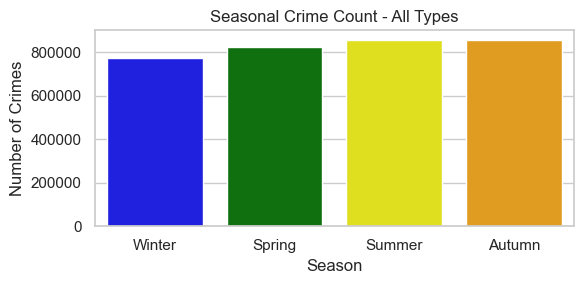

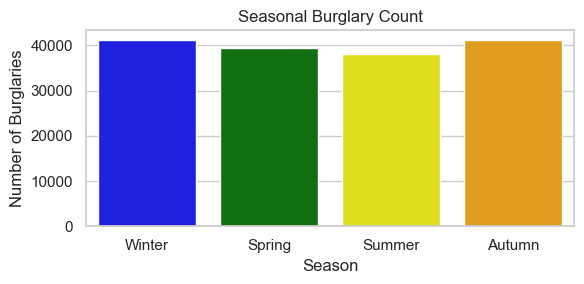

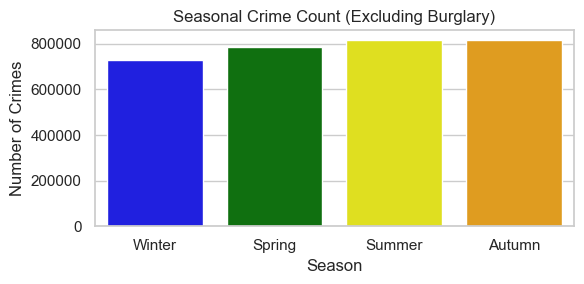

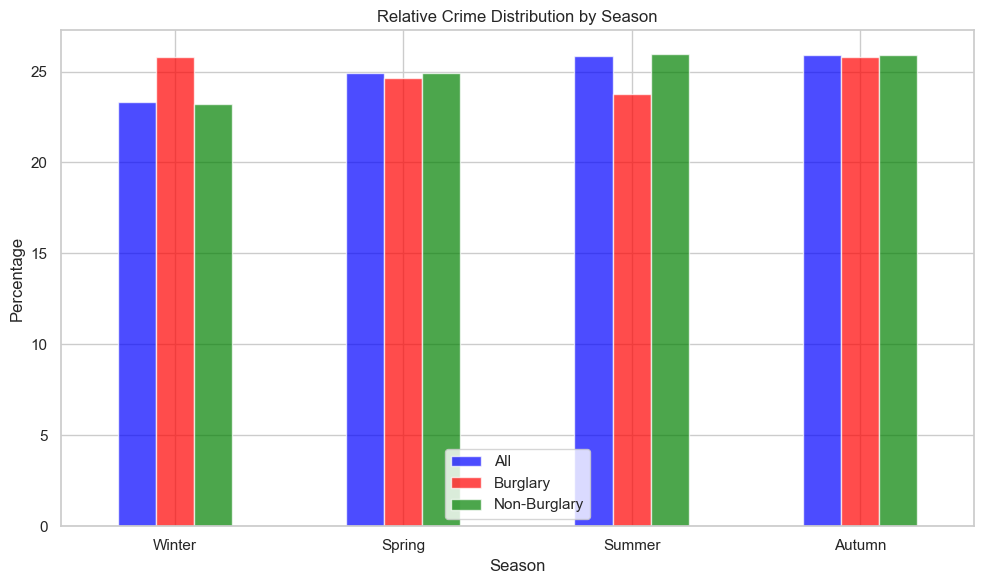

In [93]:
# Seasonal distribution - ALL crimes
seasonal_all = df.groupby('Season').size().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
plt.figure(figsize=(6, 3))

sns.barplot(x=seasonal_all.index, y=seasonal_all.values, hue=seasonal_all.index, palette=['blue', 'green', 'yellow', 'orange'])
plt.title('Seasonal Crime Count - All Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# Seasonal distribution - BURGLARY
seasonal_burglary = df[df['Type'] == 'Burglary'].groupby('Season').size().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
plt.figure(figsize=(6, 3))

sns.barplot(x=seasonal_burglary.index, y=seasonal_burglary.values, hue=seasonal_all.index, palette=['blue', 'green', 'yellow', 'orange'])
plt.title('Seasonal Burglary Count')
plt.ylabel('Number of Burglaries')
plt.tight_layout()
plt.show()

# Seasonal distribution - NON-BURGLARY
seasonal_non_burglary = df[df['Type'] != 'Burglary'].groupby('Season').size().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
plt.figure(figsize=(6, 3))

sns.barplot(x=seasonal_non_burglary.index, y=seasonal_non_burglary.values, hue=seasonal_all.index, palette=['blue', 'green', 'yellow', 'orange'])
plt.title('Seasonal Crime Count (Excluding Burglary)')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# Relative Seasonal Comparison as % Share
seasonal_relative = pd.DataFrame({
    'All': seasonal_all,
    'Burglary': seasonal_burglary,
    'Non-Burglary': seasonal_non_burglary
}).fillna(0)

seasonal_percent = seasonal_relative.div(seasonal_relative.sum(axis=0), axis=1) * 100
seasonal_percent.plot(kind='bar', color=['blue', 'red', 'green'], alpha=0.7)
plt.title('Relative Crime Distribution by Season')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



We can see that in the Winter there is an unusual trend of burglary despite the general decrease in crimes.

Some more visualizations that might help show underlying trends.

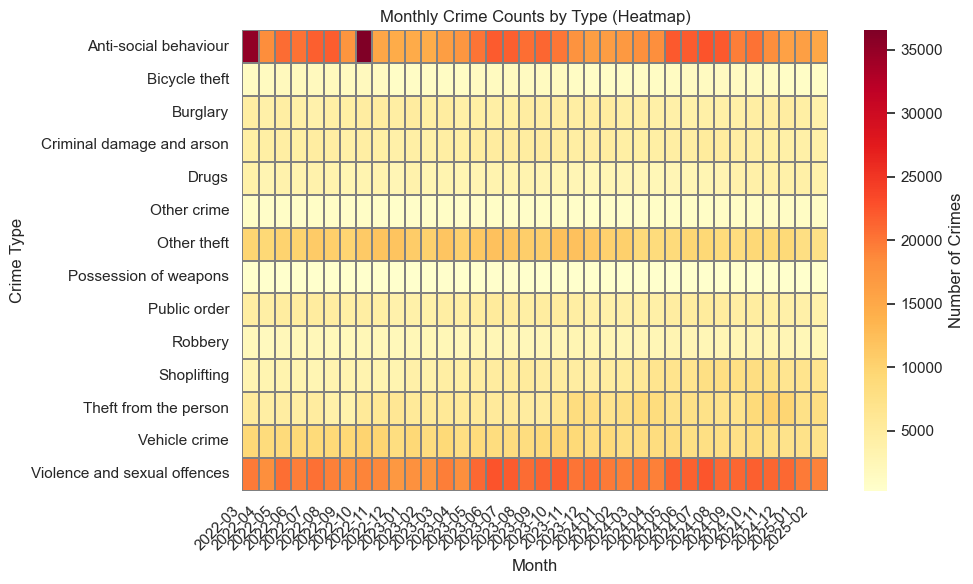

In [94]:
# Heatmap of Monthly Crime Type Distribution

monthly_type_counts = df.groupby([df['Month'], 'Type']).size().unstack().fillna(0)

monthly_labels = [d.strftime('%Y-%m') for d in monthly_type_counts.index]

plt.figure(figsize=(10, 6))
sns.heatmap(
    monthly_type_counts.T,
    cmap="YlOrRd",
    linewidths=0.2,
    linecolor='gray',
    cbar_kws={'label': 'Number of Crimes'}
)

plt.xticks(
    ticks=np.arange(len(monthly_labels)),
    labels=monthly_labels,
    rotation=45,
    ha='right'
)

plt.title('Monthly Crime Counts by Type (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()




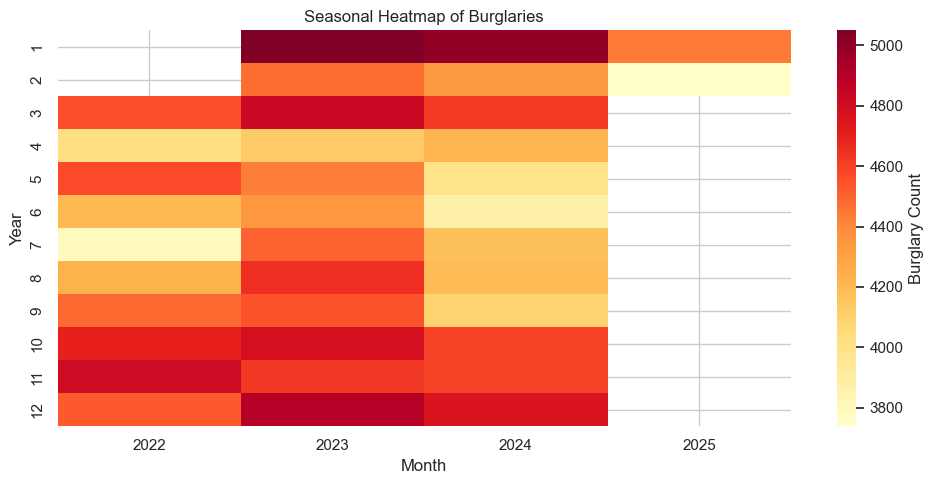

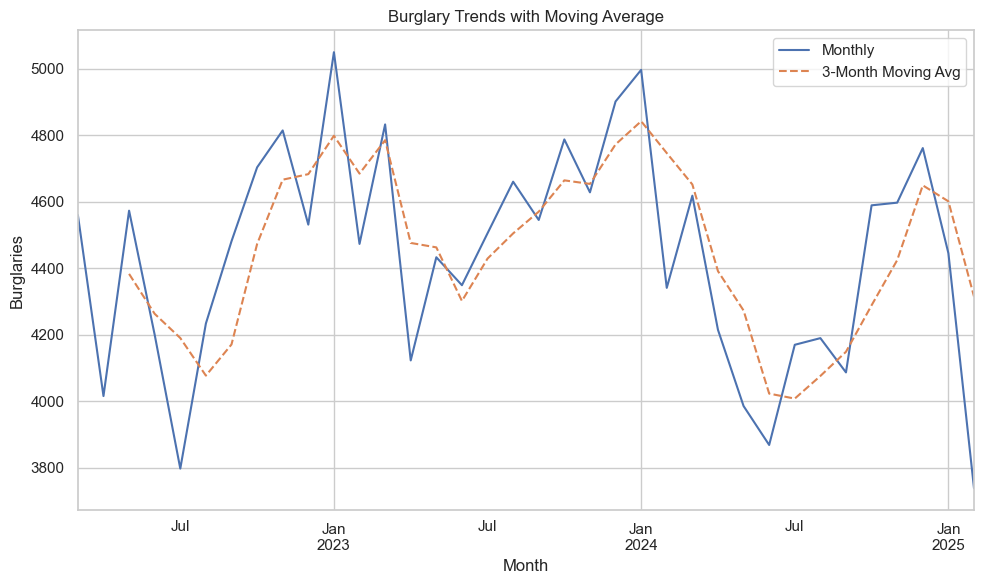

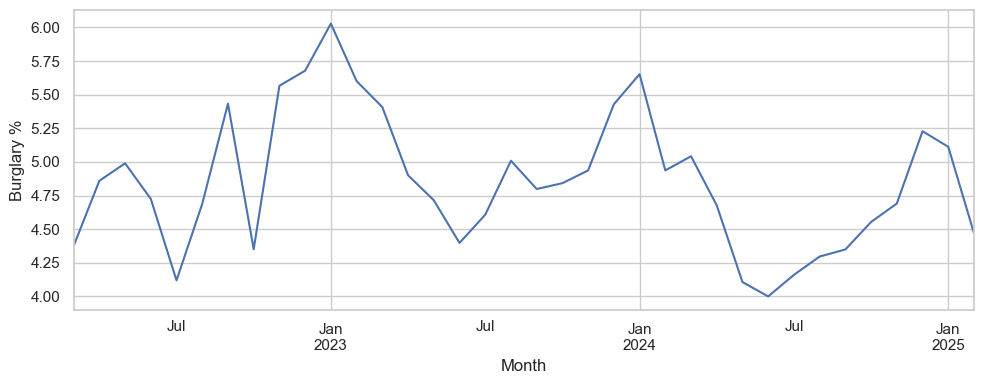

In [95]:

# Seasonal Heatmap
heatmap_data = monthly_burglary.reset_index()
heatmap_data['Year'] = heatmap_data['Month'].dt.year
heatmap_data['Month_Num'] = heatmap_data['Month'].dt.month
heatmap_data = heatmap_data.pivot(index='Month_Num', columns='Year', values=0)
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, cbar_kws={'label': 'Burglary Count'})
plt.title('Seasonal Heatmap of Burglaries')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# Line Plot with Moving Average
monthly_burglary.plot(label='Monthly')
monthly_burglary.rolling(3).mean().plot(label='3-Month Moving Avg', linestyle='--')
plt.title('Burglary Trends with Moving Average')
plt.ylabel('Burglaries')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate Burglary as % of Total Crime
monthly_combined['Burglary %'] = (monthly_combined['Burglary'] / monthly_combined['All Crimes']) * 100

# Plot Burglary as % of Total Crime
plt.figure(figsize=(10, 4))
monthly_combined['Burglary %'].plot()
plt.ylabel('Burglary %')
plt.tight_layout()
plt.show()
